# Objectives
YWBAT
* list the assumptions of OLS
* explain why multicollinearity is bad both predictively and mathematically
* summarize a statsmodels summary of an OLS

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ames.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Assumptions of Linear Regression
* linearity: the relationship between the predictors and the target is linear
* Homoskedacicity: the variance of the residuals is equivalent for any given X. Error is normally distributed. 
* X values are independent. All of the rows of data are independent from one another.
    * no multicollinearity
    * use linear regression on your features to check for this (VIF)
* Y is normally distributed


# To do modeling it's best to follow the OSEMN Process
<img src="images/osemn.jpeg"/>

* [X] Obtain
* [ ] Scrub, skip
* [X] Explore
* [X] Model 
* [X] Interpret

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols[:5]

(38, ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual'])

In [5]:
numerical_df = df[numerical_cols]
numerical_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# categorical data is data that is a category and order would not make sense

In [6]:
numerical_df.isna().sum()/numerical_df.shape[0]

Id               0.000000
MSSubClass       0.000000
LotFrontage      0.177397
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float

# Let's just build an OLS model

In [7]:
cols = ["LotArea", "BsmtFinSF1", "GrLivArea", "MasVnrArea", "Fireplaces"]

In [8]:
numerical_df_samp = numerical_df[cols]
numerical_df_samp.head()

,LotArea,BsmtFinSF1,GrLivArea,MasVnrArea,Fireplaces
0,8450,706,1710,196.0,0
1,9600,978,1262,0.0,1
2,11250,486,1786,162.0,1
3,9550,216,1717,0.0,1
4,14260,655,2198,350.0,1


# What is the goal of linear regression? 
* can we make a linear equation to predict the saleprice? 

saleprice_hat = B0 + B1xLotArea + B2xBsmtFinSF1 + ... + B5xFireplaces

* adding multiple terms makes it polynomial
* what is making this equation linear? 
    * the features are all a power of 1
* what are we solving for when we do linear regression? 
    * beta coefficients

In [9]:
X = numerical_df[cols]
X.head()

,LotArea,BsmtFinSF1,GrLivArea,MasVnrArea,Fireplaces
0,8450,706,1710,196.0,0
1,9600,978,1262,0.0,1
2,11250,486,1786,162.0,1
3,9550,216,1717,0.0,1
4,14260,655,2198,350.0,1


In [10]:
X = sm.add_constant(X)
X.head()

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,LotArea,BsmtFinSF1,GrLivArea,MasVnrArea,Fireplaces
0,1.0,8450,706,1710,196.0,0
1,1.0,9600,978,1262,0.0,1
2,1.0,11250,486,1786,162.0,1
3,1.0,9550,216,1717,0.0,1
4,1.0,14260,655,2198,350.0,1


In [11]:
y = numerical_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [12]:
numerical_df.dropna(axis=0, inplace=True)
X = numerical_df[cols] # create your X data
X = sm.add_constant(X) # add a constant
y = numerical_df['SalePrice'] # got our target data

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
ols = sm.OLS(y, X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     322.8
Date:                Thu, 28 May 2020   Prob (F-statistic):          8.39e-214
Time:                        13:12:01   Log-Likelihood:                -13786.
No. Observations:                1121   AIC:                         2.758e+04
Df Residuals:                    1115   BIC:                         2.761e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.364e+04   5165.184      4.576      0.000    1.35e+04    3.38e+04
LotArea        0.5483      0.210      2.611      0.009       0.136       0.960
BsmtFinSF1    29.9726      3.676      8.154      0.000      22.760      37.185
GrLivArea     81.7819      3.755     21.777      0.000      74.413      89.151
MasVnrArea    84.5858      9.448      8.953      0.000      66.048     103.123
Fireplaces  1.451e+04   2915.011      4.977      0.000    8787.470    2.02e+04
==============================================================================
Omnibus:                      484.168   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25222.017
Skew:                          -1.203   Prob(JB):                         0.00
Kurtosis:                      26.113   Cond. No.                     4.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Why does multicollinearity ruin a model?
* if 1 feature is correlated with 2 or more features than a change in that feature will cause change in the other features. 
* it creates more weight towards the correlated features 
* there is no signal coming from correlated features 
* there is no solution mathematically to your system of equations

# Visualize Residuals! 

In [14]:
residuals = results.resid

In [15]:
# histogram

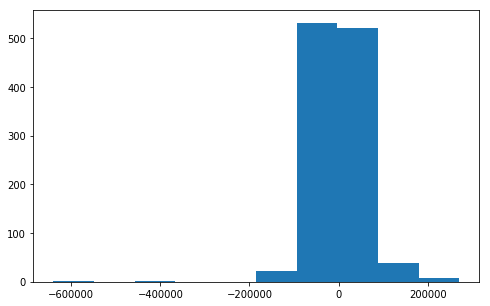

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(residuals)
plt.show()

In [17]:
# scatterplot

In [18]:
x = np.linspace(0, 1, len(residuals))

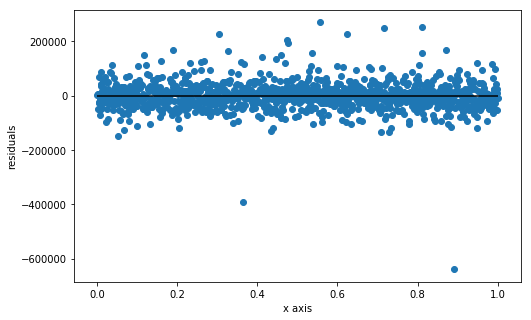

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(x, residuals)
plt.xlabel("x axis")
plt.ylabel("residuals")
plt.hlines(xmin=0, xmax=1, y=0, label="y_hat")
plt.show()

In [20]:
# We want our scatterplot
# evenly spaced around 0
# no outliers

In [21]:
scs.kstest(scs.zscore(residuals), 'norm', args=(0, 1))

KstestResult(statistic=0.08271013001644745, pvalue=4.047882956342313e-07)

In [22]:
scs.shapiro(residuals)

(0.8694653511047363, 1.4159442969666034e-29)

### What did we learn today? 
* in linear regression we're looking for beta coefficients 
* osemn process
    * great process for building models
* the 4 assumptions of linear regression
    * linearity
    * homoskedacicity
    * y is normally distributed
    * xvalues are independent 
* why multicollinearity ruins a model
* continuous and categorical data 

## Objectives
YWBAT (You Will Be Able To)
* transform data to normalize it 
    * explain the rational behind normalizing data
* explain what standardization does
* Test for multicollinearity using a VIF Test

# Transformations
* normalization - make data more like a normal distribution
* standardization - scaling the data 

In [23]:
numerical_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# Transform data - normalization
* log transormations
* boxcox transformations

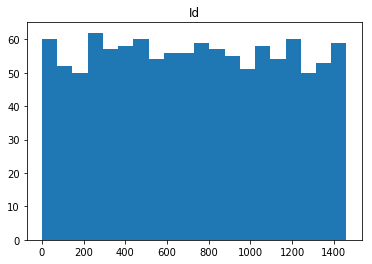

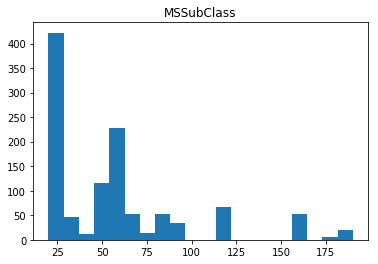

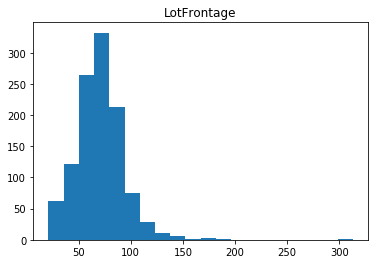

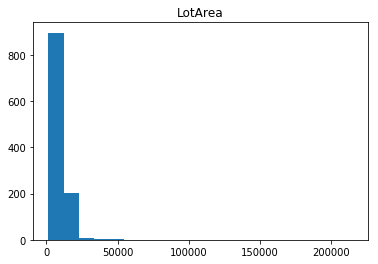

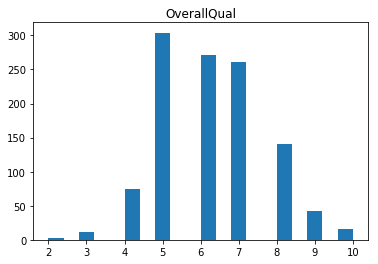

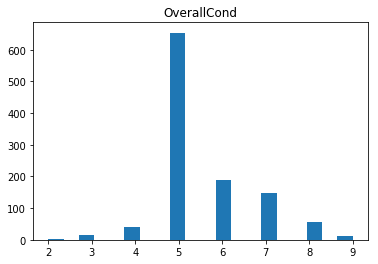

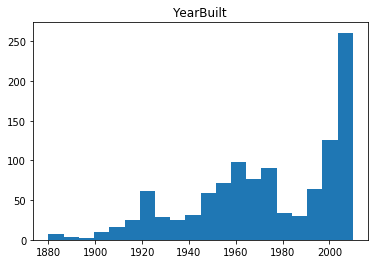

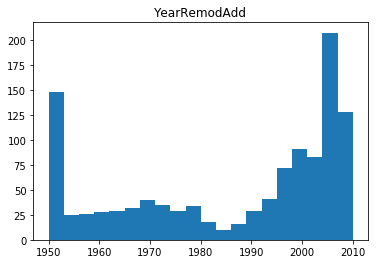

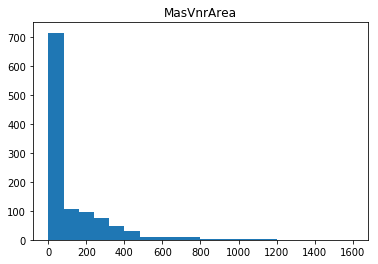

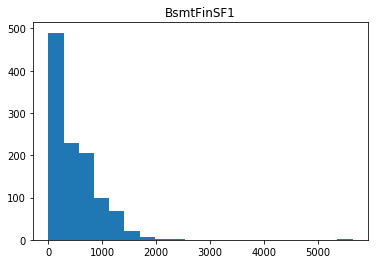

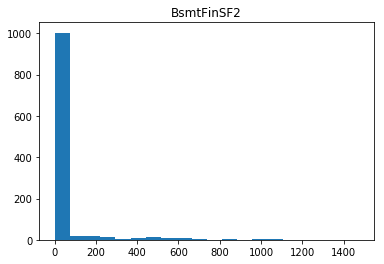

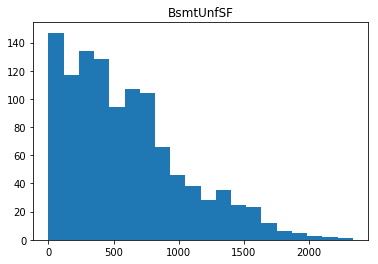

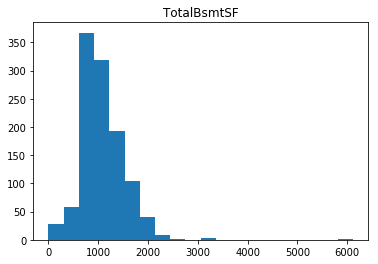

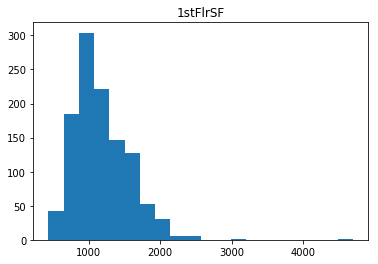

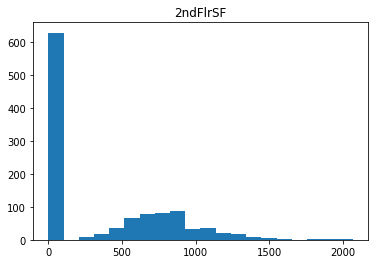

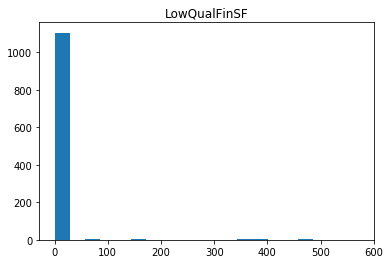

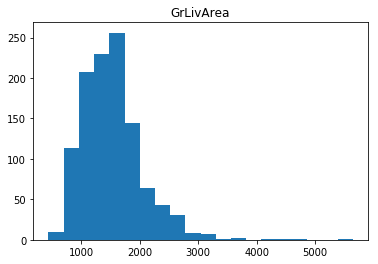

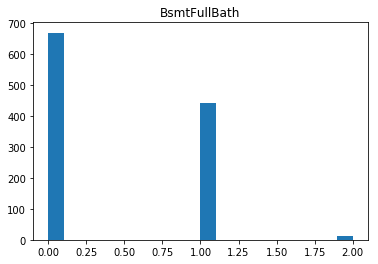

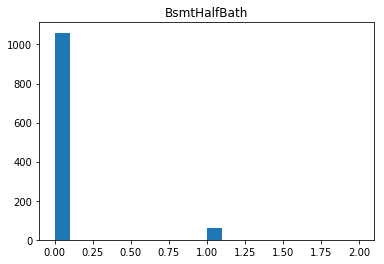

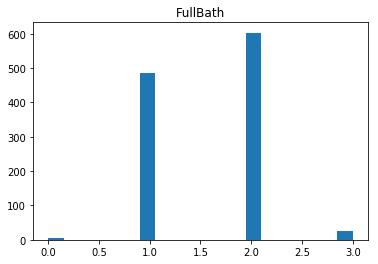

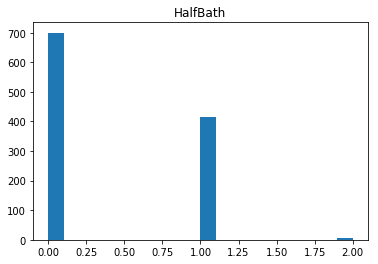

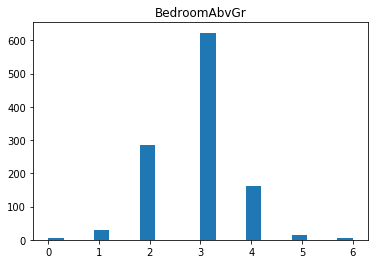

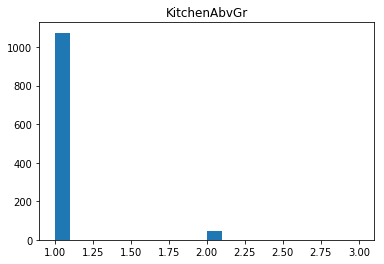

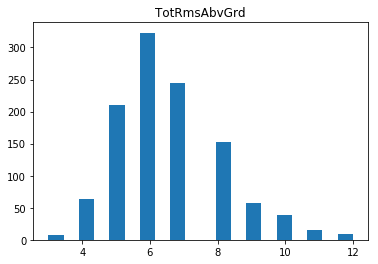

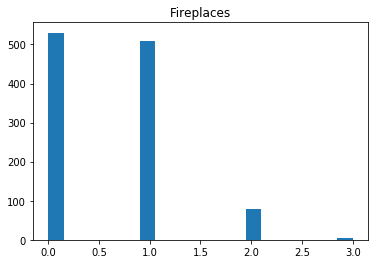

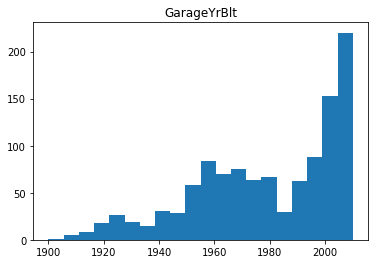

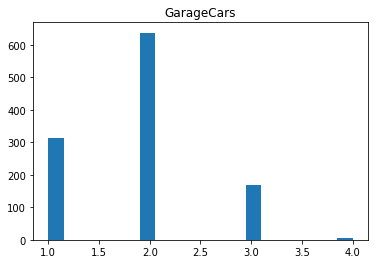

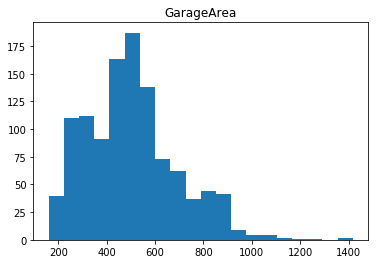

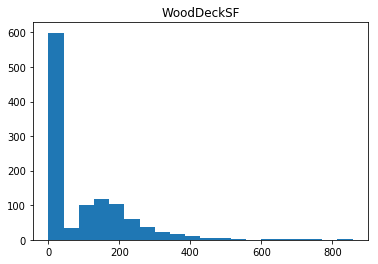

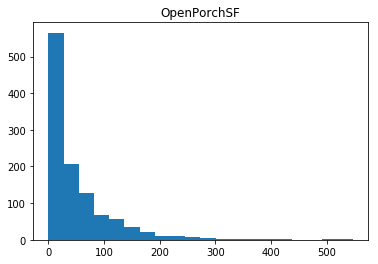

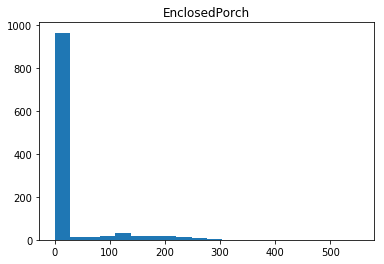

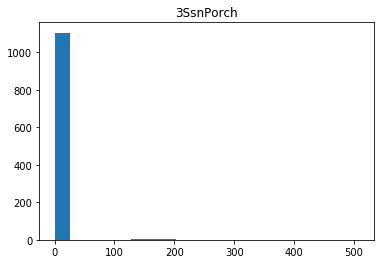

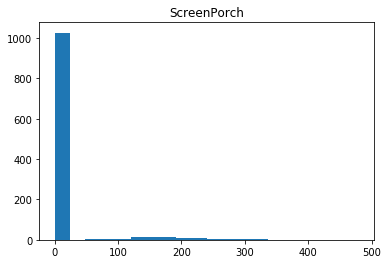

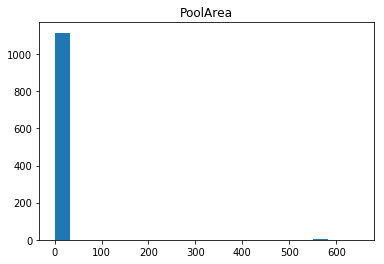

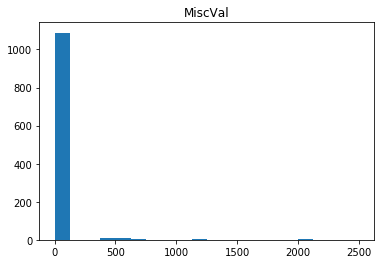

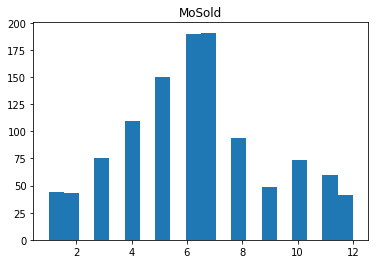

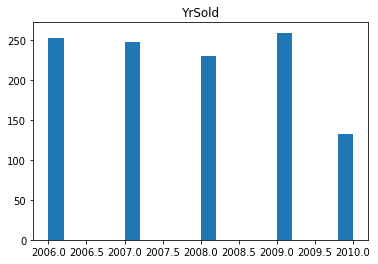

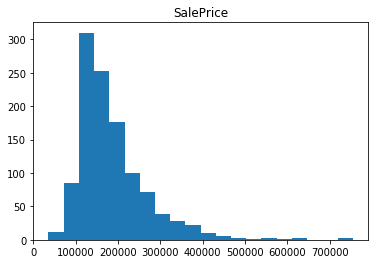

In [27]:
for col in numerical_df.columns:
    plt.hist(numerical_df[col], bins=20)
    plt.title(col)
    plt.show()

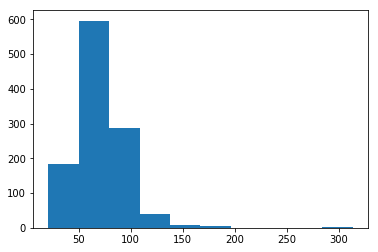

In [28]:
lot_frontage = numerical_df['LotFrontage']
plt.hist(lot_frontage)
plt.show()

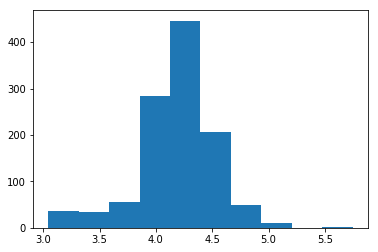

In [32]:
log_lot_frontage = np.log(lot_frontage)
plt.hist(log_lot_frontage)
plt.show()

In [29]:
np.exp(5) # e = 2.718.... 2.718^? = 148.413

148.4131591025766

In [30]:
np.log(148.4131591025766)

5.0

In [31]:
np.log(200)

5.298317366548036

In [33]:
np.log(300), np.log(200)

(5.703782474656201, 5.298317366548036)

# Comparing the skewness and kurtosis we see that both scores get much closer to 0

In [34]:
scs.skew(lot_frontage), scs.kurtosis(lot_frontage)

(2.2481832382080698, 18.356938419863447)

In [35]:
scs.skew(log_lot_frontage), scs.kurtosis(log_lot_frontage)

(-0.7453562715504678, 2.4194490925703844)

# Log Transformations
* Pros
    * normalizes data 
* Cons
    * Interpreting a log is difficult

# Box Cox Transformation

In [36]:
bc_lot_frontage, lam = scs.boxcox(lot_frontage)

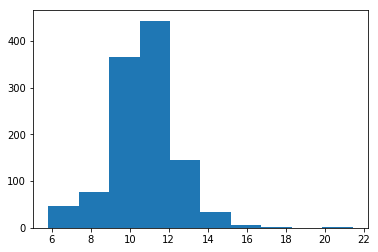

In [37]:
plt.hist(bc_lot_frontage)
plt.show()

In [38]:
scs.skew(bc_lot_frontage), scs.kurtosis(bc_lot_frontage)

(0.12110392077998999, 3.3689474840388636)

# Boxcox in Sklearn - without standardization

In [39]:
from sklearn.preprocessing import PowerTransformer

In [48]:
pt = PowerTransformer(method='box-cox', standardize=False)

In [54]:
lot_frontage.values

array([65., 80., 68., ..., 66., 68., 75.])

In [55]:
bc_lot_frontage = pt.fit_transform(lot_frontage.values.reshape(-1, 1))

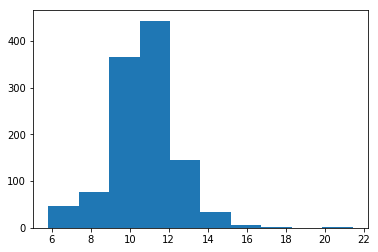

In [57]:
plt.hist(bc_lot_frontage)
plt.show()

# Boxcox in Sklearn - with standardization

In [58]:
pt = PowerTransformer(method='box-cox', standardize=True)

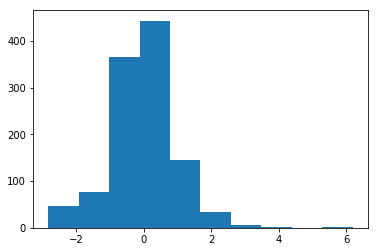

In [59]:
bc_lot_frontage = pt.fit_transform(lot_frontage.values.reshape(-1, 1))
plt.hist(bc_lot_frontage)
plt.show()

# Workflow w/o train test split

In [60]:
X = numerical_df.drop(columns='SalePrice')
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [61]:
y = numerical_df['SalePrice']

In [63]:
X['log_lot_frontage'] = np.log(X['LotFrontage'])
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,log_lot_frontage
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,4.174387
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,4.382027
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,4.219508
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,4.094345
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,4.430817


In [64]:
X['log_garage_area'] = np.log(X['GarageArea'])
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,log_lot_frontage,log_garage_area
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,4.174387,6.306275
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,4.382027,6.131226
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,4.219508,6.410175
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,4.094345,6.464588
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,4.430817,6.728629


In [65]:
X['bc_gc_living_area'], lam = scs.boxcox(X['GrLivArea'])
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,log_lot_frontage,log_garage_area,bc_gc_living_area
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,4.174387,6.306275,5.812015
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,4.382027,6.131226,5.628985
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,4.219508,6.410175,5.837900
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,4.094345,6.464588,5.814450
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,4.430817,6.728629,5.960381


In [78]:
X['SalePrice'] = y
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,log_lot_frontage,log_garage_area,bc_gc_living_area,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,2,2008,4.174387,6.306275,5.812015,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,5,2007,4.382027,6.131226,5.628985,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,9,2008,4.219508,6.410175,5.837900,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,2,2006,4.094345,6.464588,5.814450,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,12,2008,4.430817,6.728629,5.960381,250000


#### Build a model with the columns untransformed and compare it to a model with transformed columns

In [66]:
ut_cols = ['LotFrontage', 'GarageArea', 'GrLivArea']
t_cols = ['log_lot_frontage', 'log_garage_area', 'bc_gc_living_area']

In [79]:
def build_ols(df=numerical_df, cols=['LotFrontage', 'GarageArea', 'GrLivArea'], target='SalePrice'):
    x = df[cols]
    y = df[target]
    ols = sm.OLS(y, x)
    res = ols.fit()
    print(res.summary())
    return ols

In [84]:
build_ols(df=numerical_df, cols=ut_cols[1:])

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              7645.
Date:                Thu, 28 May 2020   Prob (F-statistic):                        0.00
Time:                        14:02:00   Log-Likelihood:                         -13786.
No. Observations:                1121   AIC:                                  2.758e+04
Df Residuals:                    1119   BIC:                                  2.759e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Interpret the OLS Summary
* Section A - model
    * R2 -> Explained Variance 
    * P(F) < 0.05
    * AIC, BIC - regularization scores
* Section B - features
    * pvalues
        * H0: the coefficient predicts the target randomly
            * this happens with
                * bad predictors
                * multicollinearity
                * non normal data
        * HA: the coefficient predicts the target not randomly
* Section C - residuals
    * Are my residuals normal?
        * skew -> 0 is ideal
        * kurtosis -> 0 is ideal 
    * Cond. No -> multicollinearity smaller is better

In [85]:
build_ols(df=X, cols=t_cols[1:])

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              3461.
Date:                Thu, 28 May 2020   Prob (F-statistic):                        0.00
Time:                        14:06:15   Log-Likelihood:                         -14186.
No. Observations:                1121   AIC:                                  2.838e+04
Df Residuals:                    1119   BIC:                                  2.839e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------